In [ ]:
import torch

torch.cuda.is_available()

False

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a freuqnecy array from 0 to 100 with a step of 10
frequency_array = np.arange(0, 100, 10)
print(frequency_array)
# create a array for frequency of 1Khz using np
frequency_1khz = np.arange(0, 1000, 10)
array1 = np.array([1, 0, 1, 0])
array2 = np.array([0, 1, 0, 1])
# Find convolution of two arrays
convolution_result = np.convolve(array1, array2)
print(convolution_result)

[ 0 10 20 30 40 50 60 70 80 90]
[0 1 0 2 0 1 0]


### Sine signal with FFT Calculations


Number of samples: 10


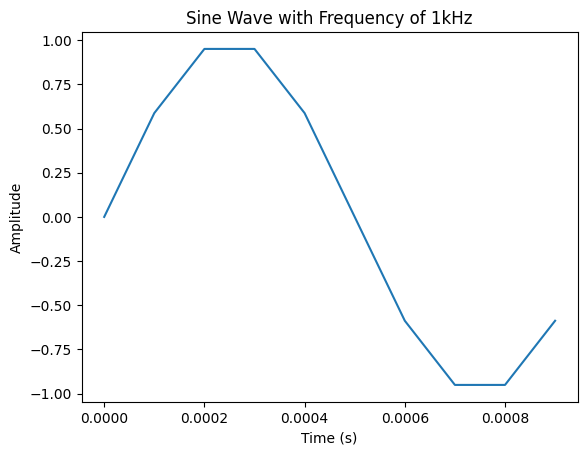

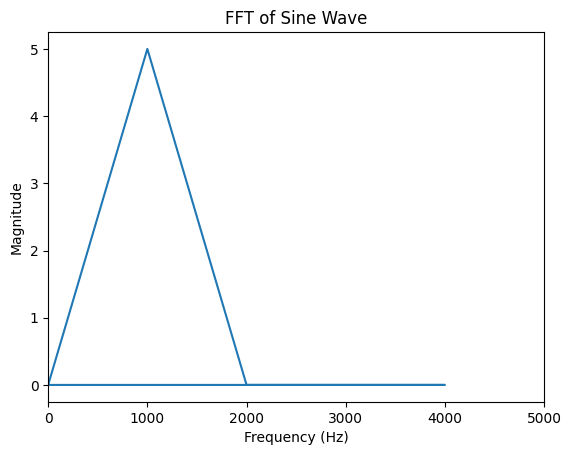

In [3]:
# Create a sine wave with frequency of 1kHz and sampling rate of 10kHz
sampling_rate = 10000
frequency = 1000
t = np.arange(0, 0.001, 1 / sampling_rate)
sine_wave = np.sin(2 * np.pi * frequency * t)
print(f"Number of samples: {len(sine_wave)}")
# Use matplotlib to plot the sine wave


plt.plot(t, sine_wave)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Wave with Frequency of 1kHz")
plt.show()

# Calculate the FFT of the sine wave
fft_result = np.fft.fft(sine_wave)
# Calculate the frequencies corresponding to the FFT result
frequencies = np.fft.fftfreq(len(sine_wave), 1 / sampling_rate)
# Plot the magnitude of the FFT result
plt.plot(frequencies, np.abs(fft_result))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Sine Wave")
plt.xlim(0, 5000)  # Limit x-axis to 5k
plt.show()

### Low-Pass Filter


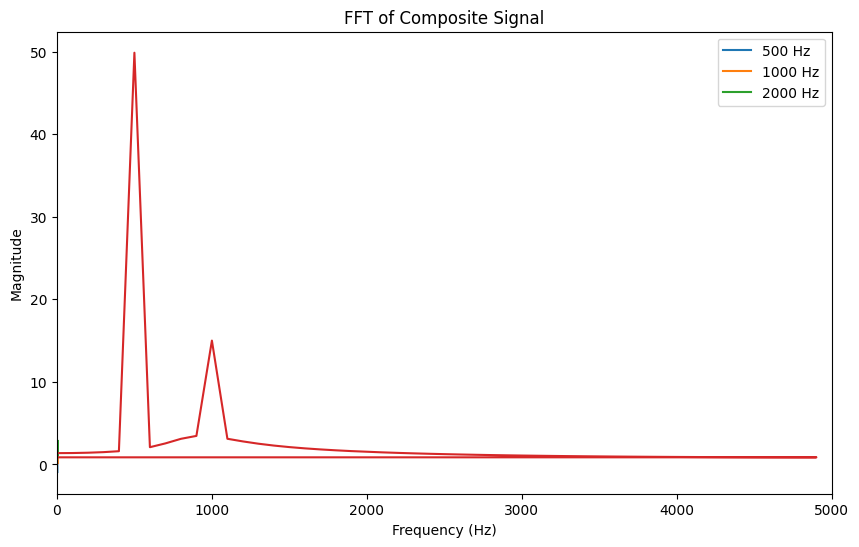

In [4]:
from scipy.signal import butter, filtfilt


def apply_low_pass(signal, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (fs / 2), btype="low")
    return filtfilt(b, a, signal)


# Create a list of 3 sine waves of different frequencies
frequencies = [500, 1000, 2000]
sine_waves = []
sampling_rate = 10000
t = np.arange(0, 0.01, 1 / sampling_rate)
for freq in frequencies:
    sine_wave = np.sin(2 * np.pi * freq * t)
    sine_waves.append(sine_wave)
# Plot the sine waves
plt.figure(figsize=(10, 6))
for i, sine_wave in enumerate(sine_waves):
    plt.plot(t, sine_wave + i, label=f"{frequencies[i]} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Sine Waves of Different Frequencies")
plt.legend()
# plt.show()
composite_signal = np.sum(sine_waves, axis=0)
composite = sum(sine_waves)  # or np.sum(sine_waves, axis=0)
filtered_composite = apply_low_pass(composite, cutoff=900, fs=sampling_rate)
# Calculate fft of composite signal
fft_composite = np.fft.fft(filtered_composite)
frequencies_composite = np.fft.fftfreq(len(filtered_composite), 1 / sampling_rate)
# Plot the magnitude of the FFT result for composite signal
plt.plot(frequencies_composite, np.abs(fft_composite))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("FFT of Composite Signal")
plt.xlim(0, 5000)  # Limit x-axis to 5k
plt.show()

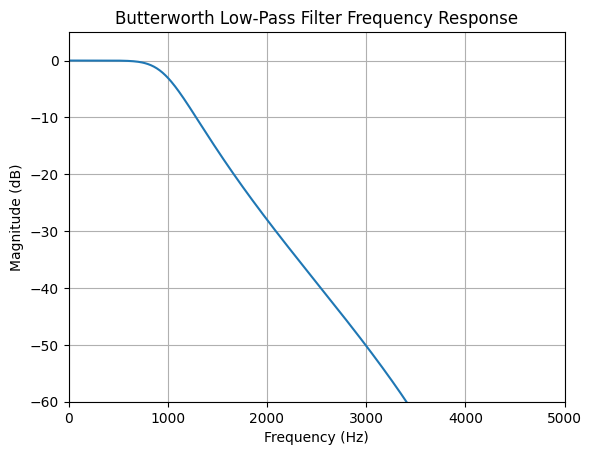

In [5]:
# Help me design a butterworth filter and try to visualize the pass band and stop band of the filter.
# I want to verify this statement ". Butterworth: Known as "maximally flat" because it has no ripples in the passband. It rolls off smoothly"
from scipy.signal import butter, freqz

# Design a Butterworth low-pass filter
cutoff = 1000  # Cutoff frequency in Hz
order = 4  # Filter order
b, a = butter(order, cutoff / (sampling_rate / 2), btype="low")
# Get the frequency response of the filter
w, h = freqz(b, a, worN=512)
# Plot the frequency response
plt.plot(0.5 * sampling_rate * w / np.pi, 20 * np.log10(np.abs(h)))
plt.title("Butterworth Low-Pass Filter Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid()
plt.xlim(0, 5000)  # Limit x-axis to 5k
plt.ylim(-60, 5)  # Limit y-axis to show passband and stopband
plt.show()